In [72]:
#imports
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle
import random 
import operator
import math
import numpy as np
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display

# %matplotlib widget: make plots interactive
matplotlib.use('nbagg') 
matplotlib.rcParams['figure.figsize']=(12,4)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [73]:
# dpath = r'C:\Users\MBK\OneDrive\Documents\uni\phd\AppliedMachineLearning2021\AppliedML2021\BigProject\audio\homemade'
dpath = os.path.abspath(os.path.join(os.path.abspath(''), '..', 'HomemadeData'))
dfiles = os.listdir(dpath)


In [74]:
x, sr = librosa.load(os.path.join(dpath, dfiles[1]))
waveformTime = np.arange(start=0, stop=2*sr*len(x), step=2*sr)

<IPython.core.display.Javascript object>


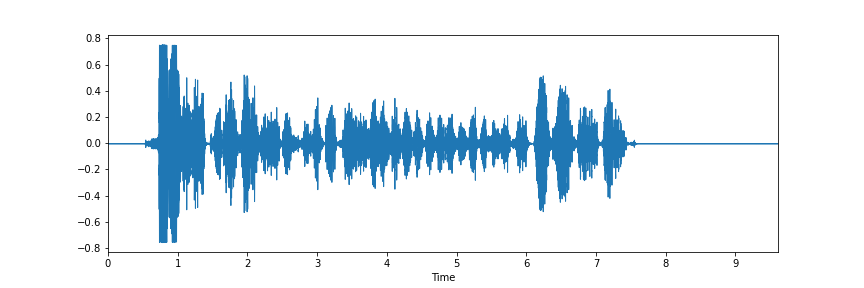

In [75]:
plt.figure('view waveform')
librosa.display.waveplot(x)
ipd.Audio(x, rate=sr)


In [52]:
hop_length = 500 # samples per frame
onset_env = librosa.onset.onset_strength(x, sr=sr, hop_length=hop_length, n_fft=2048)
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

<IPython.core.display.Javascript object>


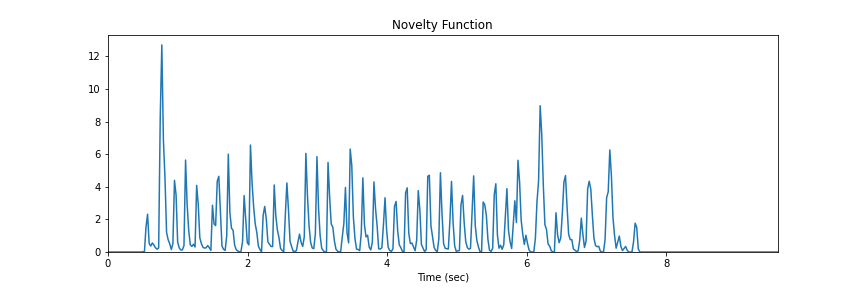

In [65]:
hf=plt.figure('onset function')
# hf.clf()
ax=hf.add_subplot(111)
ax.plot(t, onset_env, label='novelty function')
# ax.plot(waveformTime*1e-9, x, label='audio waveform')
ax.set_xlim(0, t.max())
ax.set_ylim(0)
ax.set_xlabel('Time (sec)')
ax.set_title('Novelty Function')
# ax.semilogy()
hf.show()

In [67]:
S = librosa.stft(onset_env, hop_length=1, n_fft=512)
fourier_tempogram = np.absolute(S)

<IPython.core.display.Javascript object>


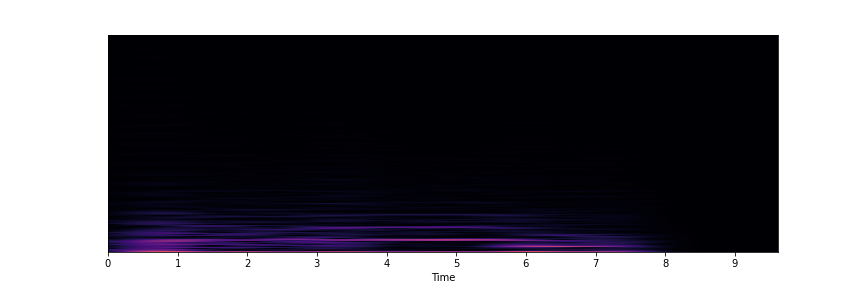

In [42]:
hf2=plt.figure('tempogram')
librosa.display.specshow(fourier_tempogram, sr=sr, hop_length=hop_length, x_axis='time')

<IPython.core.display.Javascript object>


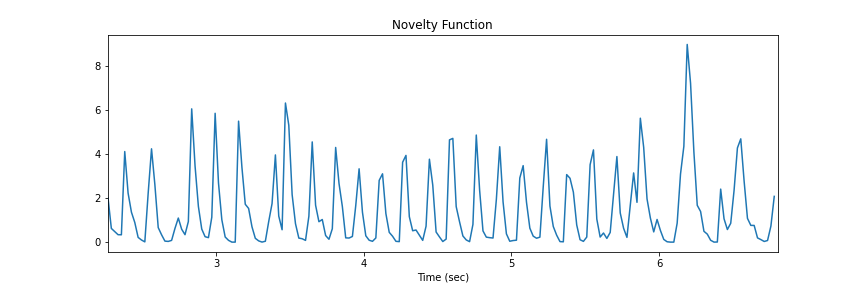

<IPython.core.display.Javascript object>


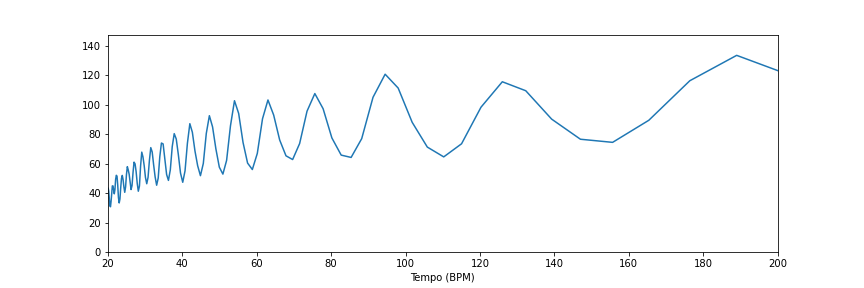

<ipython-input-71-2200f2dca1d3>:12: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(60/t[:n1-n0], r)


(0.0, 147.5785750375305)

In [71]:
n0 = 100
n1 = 300
hf3=plt.figure('Novelty function zoom')
plt.plot(t[n0:n1], onset_env[n0:n1])
plt.xlim(t[n0], t[n1])
plt.xlabel('Time (sec)')
plt.title('Novelty Function')

tmp = np.log1p(onset_env[n0:n1])
r = librosa.autocorrelate(tmp)
hf4=plt.figure('Autocorrelation of novelty function')
plt.plot(60/t[:n1-n0], r)
plt.xlim(20, 200)
plt.xlabel('Tempo (BPM)')
# plt.loglog()

plt.ylim(0)